<a href="https://colab.research.google.com/github/AnnalisaGibbs/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/AnnalisaGibbsDS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [2]:
cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')
print(cell_phones.shape)
cell_phones.head()

(9215, 3)


,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [3]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
print(population.shape)
population.head()


(59297, 3)


,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [11]:
cell_pop = pd.merge(cell_phones, population) 
#how='inner'
print(cell_pop.shape)
cell_pop.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [12]:

print(geo_country_codes.shape)
geo_country_codes.head()

(273, 33)


,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [15]:
final = pd.merge(cell_pop, geo_country_codes[['geo', 'country']])
print(final.shape)
final.head()

(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [18]:
final['cell_per_person'] = final['cell_phones_total']/final['population_total']
print(final.shape)
final.head()

(8590, 6)


,geo,time,cell_phones_total,population_total,country,cell_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [22]:
final[final['country'].str.match('United States')]

,geo,time,cell_phones_total,population_total,country,cell_per_person
8092,usa,1960,0.0,186808228,United States,0.000000
8093,usa,1965,0.0,199815540,United States,0.000000
8094,usa,1970,0.0,209588150,United States,0.000000
8095,usa,1975,0.0,219205296,United States,0.000000
8096,usa,1976,0.0,221239215,United States,0.000000
8097,usa,1977,0.0,223324042,United States,0.000000
8098,usa,1978,0.0,225449657,United States,0.000000
8099,usa,1979,0.0,227599878,United States,0.000000
8100,usa,1980,0.0,229763052,United States,0.000000
8101,usa,1984,91600.0,238573861,United States,0.000384


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [27]:
final['geo'] = final['geo'].str.upper()
print(final.shape)
final.head()

(8590, 6)


,geo,time,cell_phones_total,population_total,country,cell_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [28]:
final.describe()

,time,cell_phones_total,population_total,cell_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [30]:
final.describe(exclude='number')

,geo,country
count,8590,8590
unique,195,195
top,GEO,Uganda
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [53]:
top = final[final.time ==2017]
top = top.sort_values(by=['cell_phones_total'], ascending = False)
top.head()
#top = final.time.isin([2017])
#top.sort_values()

,geo,time,cell_phones_total,population_total,country,cell_per_person
1496,CHN,2017,1.474097e+09,1409517397,China,1.045817
3595,IND,2017,1.168902e+09,1339180127,India,0.872849
3549,IDN,2017,4.589232e+08,263991379,Indonesia,1.738402
8134,USA,2017,3.958810e+08,324459463,United States,1.220125
1084,BRA,2017,2.364885e+08,209288278,Brazil,1.129966


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [67]:
usa = final[final['country'] == 'United States']
year_greater = usa[usa['cell_phones_total']>usa['population_total']]
year_greater.head()
#usa.head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
8131,USA,2014,355500000.0,317718779,United States,1.118914
8132,USA,2015,382307000.0,319929162,United States,1.194974
8133,USA,2016,395881000.0,322179605,United States,1.228759
8134,USA,2017,395881000.0,324459463,United States,1.220125


### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [70]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [81]:
crosstab_occ = pd.crosstab(df['Year'], df['Occupation'])
print(crosstab_occ)

Occupation  Acting, Comedy & Music  Government and Politics  Media  Other
Year                                                                     
1999                           150                        2     11      3
2000                           125                       14     21      9
2001                           114                        6     31      6
2002                            99                       11     42      7
2003                            93                       17     41     15
2004                            63                       37     45     19
2005                            60                       26     54     22
2006                            58                       31     47     25
2007                            36                       24     47     34
2008                            34                       33     77     20
2009                            34                       34     59     36
2010                            58    

In [88]:

print(crosstab_occ['Acting, Comedy & Music'].divide(crosstab_occ[column_list].sum(axis=1)).multiply(100))

Year
1999    90.361446
2000    73.964497
2001    72.611465
2002    62.264151
2003    56.024096
2004    38.414634
2005    37.037037
2006    36.024845
2007    25.531915
2008    20.731707
2009    20.858896
2010    35.151515
2011    33.742331
2012    26.829268
2013    42.771084
2014    39.263804
2015    45.000000
dtype: float64


In [89]:
print(crosstab_occ['Government and Politics'].divide(crosstab_occ[column_list].sum(axis=1)).multiply(100))

Year
1999     1.204819
2000     8.284024
2001     3.821656
2002     6.918239
2003    10.240964
2004    22.560976
2005    16.049383
2006    19.254658
2007    17.021277
2008    20.121951
2009    20.858896
2010    18.181818
2011    16.564417
2012    20.121951
2013    12.650602
2014    12.883436
2015    17.000000
dtype: float64


In [90]:
print(crosstab_occ['Media'].divide(crosstab_occ[column_list].sum(axis=1)).multiply(100))

Year
1999     6.626506
2000    12.426036
2001    19.745223
2002    26.415094
2003    24.698795
2004    27.439024
2005    33.333333
2006    29.192547
2007    33.333333
2008    46.951220
2009    36.196319
2010    30.303030
2011    31.288344
2012    31.707317
2013    30.722892
2014    32.515337
2015    24.000000
dtype: float64


In [91]:
print(crosstab_occ['Other'].divide(crosstab_occ[column_list].sum(axis=1)).multiply(100))

Year
1999     1.807229
2000     5.325444
2001     3.821656
2002     4.402516
2003     9.036145
2004    11.585366
2005    13.580247
2006    15.527950
2007    24.113475
2008    12.195122
2009    22.085890
2010    16.363636
2011    18.404908
2012    21.341463
2013    13.855422
2014    15.337423
2015    14.000000
dtype: float64


In [0]:
#column_list = list(crosstab_occ)
#crosstab_occ['percent_ACM'] = crosstab_occ.sum(axis=1)
#print(crosstab_occ)
#crosstab_occ[column_list].sum(axis=1)

### Part 2 — Recreate this explanatory visualization:

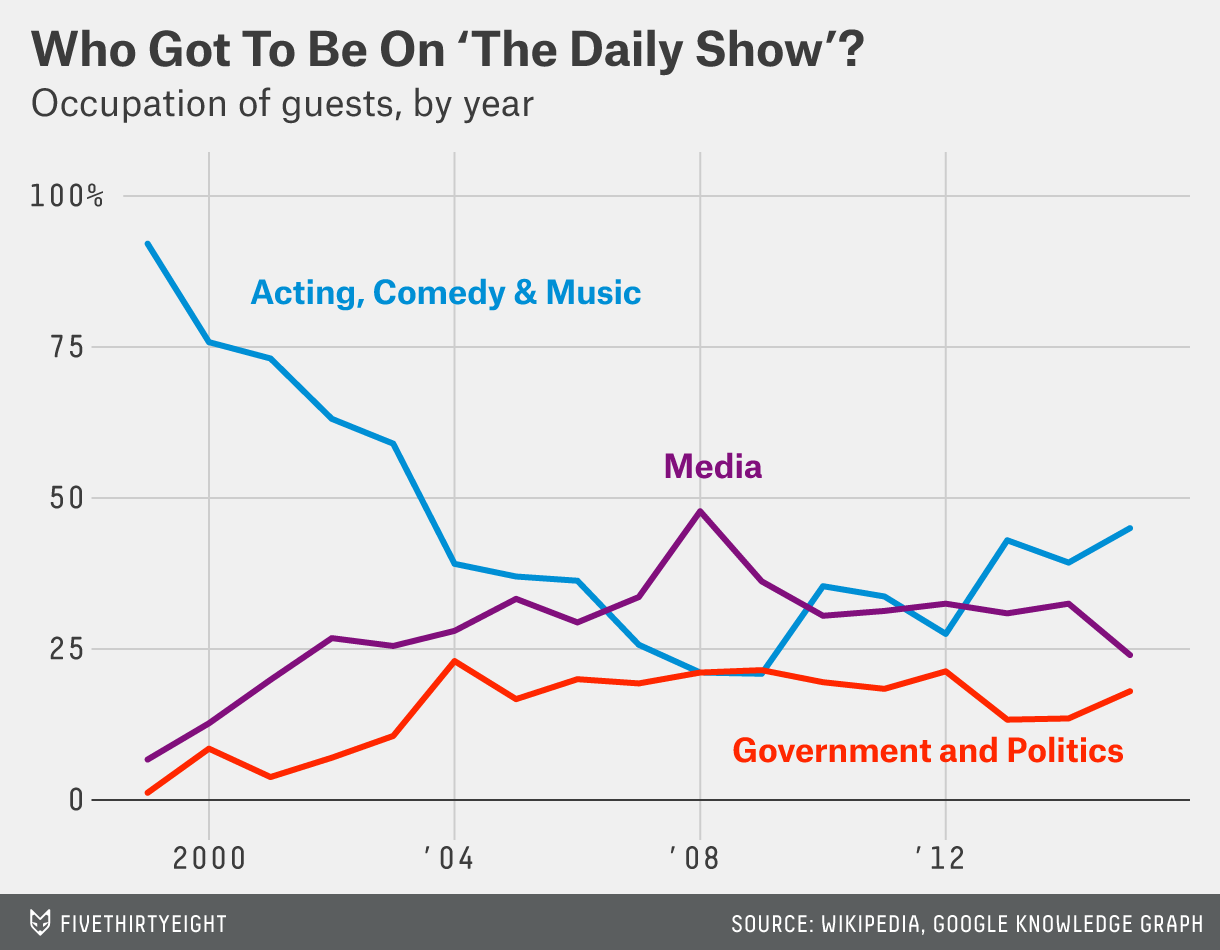

In [93]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [94]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
#sns.relplot(x="income", y="lifespan", hue="region6", size="population",
            sizes=(40, 200), alpha=.5, palette="muted", height=6, data=now);

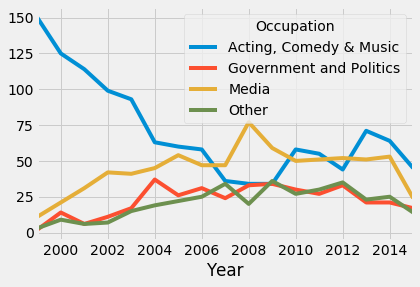

In [111]:
#import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
#plt.title('Who Got to be on the Daily Show')
#plt.yticks(range(0, 171 , 40))
crosstab_occ.plot();